# Ford GoBike Dataset
 ### by jasthi naveen

# Preliminary Wrangling

##### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area 

In [139]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [140]:
#loading the dataset 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [141]:
#rows and columns
df.shape

(183412, 16)

In [142]:
#information about rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [143]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [144]:
# checking the null values 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [145]:
#all columns in dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [146]:
#information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [147]:
# check how many values in each user type
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### We got to know some information about the dataset by now



### What is the structure of your dataset?
- The dataset contains the details of 183412 trios with 16 attributes  

- Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type and member_gender are qualitative nominal variables



### What is/are the main feature(s) of interest in your dataset?

- The main features of interest at least for me are: age, user type,time, gender, start and end station

# Data cleaning

In [148]:
#making a copy
ford_bike=df.copy()

### 1) Define
##### Dropping the rows that contain null values

### code


In [149]:
#droping all those null values
df.dropna(axis=0,inplace=True)


### Test

In [150]:
#testing for changes
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### 2) Define

##### Converting Duration from sec to min by /60 and changing data type

### Code

In [151]:
# Changing data type .
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

In [152]:
# changing duration_sec to duration in minutes
df['duration_sec'] = df['duration_sec']/60
#df.rename(columns= {"duration_sec":"duration_min"}, inplace = True )

### Test

In [153]:
#testing for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [154]:
#description of the data 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165
std,27.370082,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


- we can see that the min bornyear is 1878 ,we can consider it as outlier and drop those to 1929 (not more than 90 years )

### 3) Define

##### Deleting the age outliers and setting age below 80

### Code

In [155]:
#considering from 1939 onwards
Age=df[df.member_birth_year < 1939]
Age

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour
1285,2.466667,2019-02-28 19:29:17.627,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,19
5197,3.616667,2019-02-28 13:51:46.238,2019-02-28 13:55:24.1270,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No,13
5266,6.400000,2019-02-28 13:35:05.428,2019-02-28 13:41:30.2230,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No,13
5447,2.450000,2019-02-28 13:08:56.935,2019-02-28 13:11:24.0620,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No,13
10827,21.916667,2019-02-27 19:21:34.436,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,8.616667,2019-02-01 18:38:40.471,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No,18
177955,6.283333,2019-02-01 18:23:33.411,2019-02-01 18:29:50.7950,26.0,1st St at Folsom St,37.787290,-122.394380,321.0,5th St at Folsom,37.780146,-122.403071,5444,Subscriber,1933.0,Female,Yes,18
179280,5.916667,2019-02-01 14:32:42.247,2019-02-01 14:38:37.8960,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,1815,Subscriber,1938.0,Male,No,14
182830,7.133333,2019-02-01 07:45:05.934,2019-02-01 07:52:14.9220,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No,7


In [156]:
# droping Age > 90 
df.drop(df[(df.member_birth_year < 1929 )].index, inplace = True)

### Test

In [157]:
#testing for changes
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000
mean,11.733800,138.981141,37.771206,-122.351758,136.604655,37.771401,-122.351334,4482.518273,1984.839726,13.456172
std,27.375632,111.637185,0.100409,0.117748,111.333687,0.100314,0.117311,1659.218012,9.968641,4.734320
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1930.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


### 4) Define

##### Age is ok but not that is enought we need to find age in number for better and easy analysis

### Code

In [158]:
# Age will have only age in number
df['Age'] = 2019 - df.member_birth_year

### Test

In [159]:
#testing for changes
df.Age.head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: Age, dtype: float64

### 5) Define

##### Making start time into 2 columns hour and day

### Code

In [160]:
# using datatime module to change given formate  
df["start_time"] = pd.to_datetime(df["start_time"])

### Test

In [161]:
#testing for changes
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'Age'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174875 non-null  float64       
 1   start_time               174875 non-null  datetime64[ns]
 2   end_time                 174875 non-null  object        
 3   start_station_id         174875 non-null  float64       
 4   start_station_name       174875 non-null  object        
 5   start_station_latitude   174875 non-null  float64       
 6   start_station_longitude  174875 non-null  float64       
 7   end_station_id           174875 non-null  float64       
 8   end_station_name         174875 non-null  object        
 9   end_station_latitude     174875 non-null  float64       
 10  end_station_longitude    174875 non-null  float64       
 11  bike_id                  174875 non-null  int64         
 12  user_type       

### 6) Define

##### Dropping unwanted columns

### Code

In [163]:
#using drop to remove unwanted columns
df = df.drop(['start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','member_birth_year','bike_share_for_all_trip'], axis = 1)

### Test

In [164]:
#testing for changes
df.columns

Index(['duration_sec', 'user_type', 'member_gender', 'start_hour', 'Age'], dtype='object')

# Data Exploration

#### As there nothing mentioned on numbers, we are going to explore atleast 3 visulizations from each variate 


## Univariate Exploration

### Gender

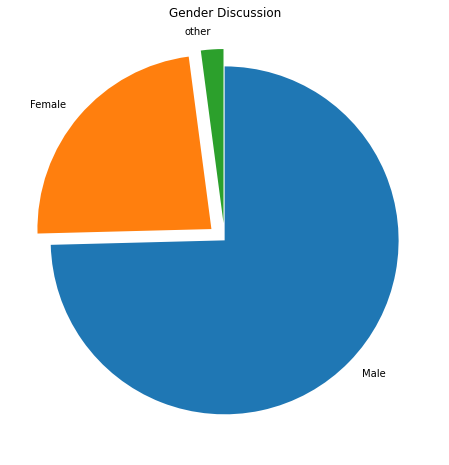

In [165]:
# plotting a pie 
plt.figure(figsize=(8,8))
Gender_counts = df['member_gender'].value_counts()

plt.pie(Gender_counts, labels = ['Male','Female','other'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False);
plt.title('Gender Discussion');

##### Note: We can have a look at Gender distribution ,female has around 30% ,which mean male use more bikes to ride than female

### Subscription

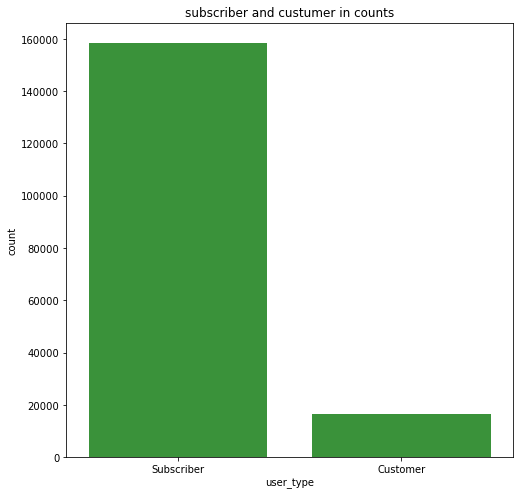

In [166]:
# plotting a bar 
#print(df['user_type'].value_counts())
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'user_type', order = df['user_type'].value_counts().index, color = sns.color_palette()[2]);
plt.title('subscriber and custumer in counts');

##### Note: bike users are mostly subscribers almost 80%

### Age

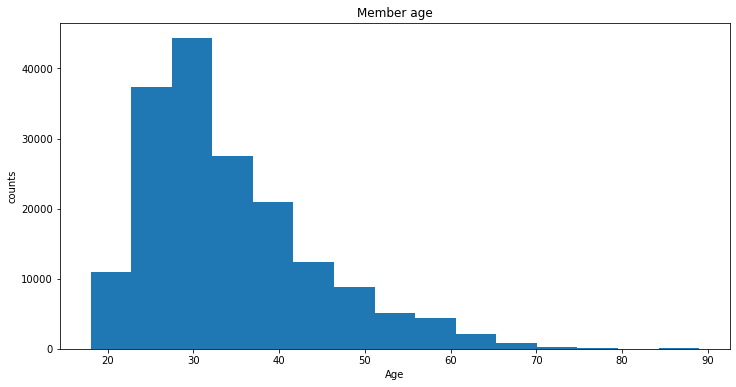

In [167]:
#plotting a histogram to check the count for perticular age 
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Member age');
plt.xlabel('Age');
plt.ylabel('counts');

##### Note: Most of bike users are around 30 and between 20-50

### Duration_sec

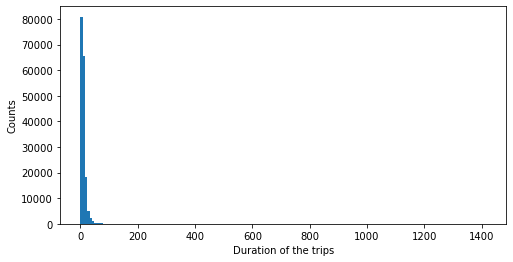

In [168]:
# plot histogram to check the distribution of durations

binsize = 8
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 4])

plt.hist(data = df, x = 'duration_sec', bins=bins);


plt.xlabel('Duration of the trips');
plt.ylabel('Counts');

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The dataset contains many males than females.
- subscribers are more than customers
- The duration in secs of the trips are most of them in between 200 to 1000...meaning that most trip are less then 15 minutes! Which makes a lot of sense because this service works with single rides (up to 30 minutes)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The age attribute had some outliers that may change the distribution, so I restricted the age range to be below 90
- converted birth year data numbers and time to hour day and finally dropped some unwanted columns

# Bivariate Exploration

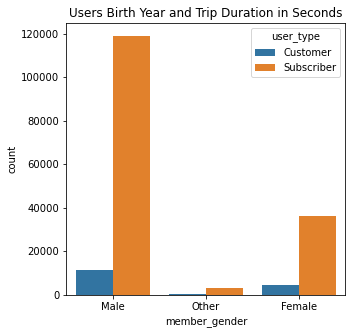

In [169]:
plt.figure(figsize = [5, 5]);

sns.countplot(data = df, x = 'member_gender', hue = 'user_type');

plt.title('Users Birth Year and Trip Duration in Seconds');

#### Note: irrespective of the gender only subscriber user number are way greater 

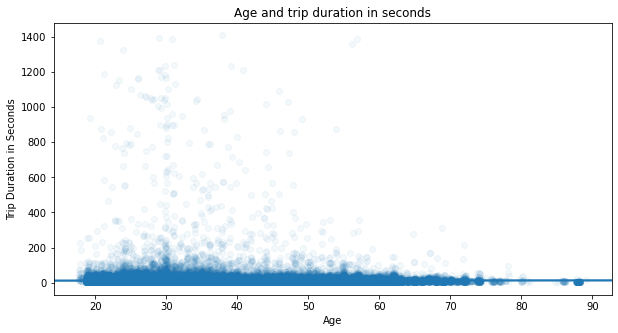

In [170]:
# plotting to find the duration taken as per their age
plt.figure(figsize=[10, 5])
#sns.regplot(data = df, x='Age', y='duration_sec'truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
sns.regplot(data = df, x = 'Age', y = 'duration_sec', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.ylabel('Trip Duration in Seconds');
plt.title('Age and trip duration in seconds');

#### Note: People between 20 and 40 years old tends to take more time in taking trips.

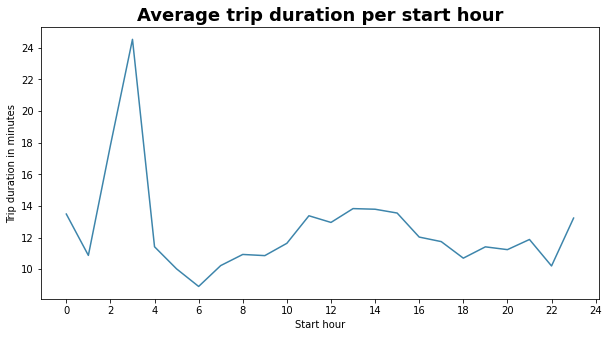

In [171]:
# plotting line chart to find peak times 
df.groupby('start_hour')['duration_sec'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Average trip duration per start hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.savefig('vis9.png',dpi=80, bbox_inches = "tight")
plt.show()

#### Note: peaks at 1-4 and good at 9-18

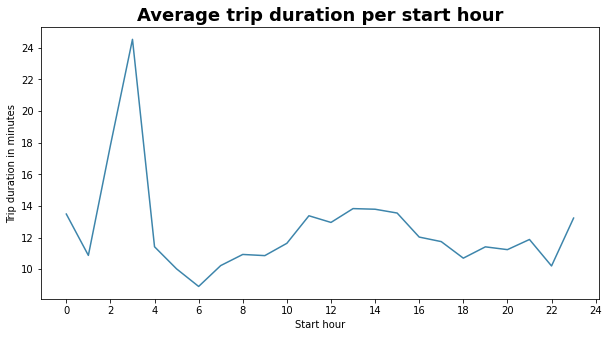

In [172]:
df.groupby('start_hour')['duration_sec'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Average trip duration per start hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.savefig('vis9.png',dpi=80, bbox_inches = "tight")
plt.show()

### Note: The duartion increases when the trip start hour is between 1-3.




### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- as expected subscribes are have more time and count than customers
- The relationship between the trip duration and age is intresting especially because it shows how the duration decreases with age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The distributions seem normal and logical.
- one month data may not me suffient to analasis and have a wholesome idea to conclude



# Multivariate Exploration


### Gender, user type and duration

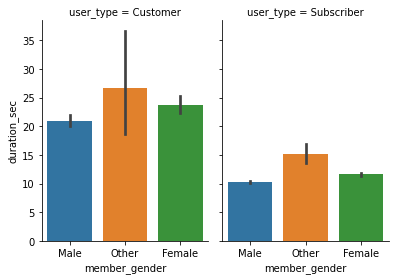

In [173]:
sns.catplot(x = "member_gender", y = "duration_sec",
                col = "user_type",
                data = df, kind = "bar",
                height=4, aspect=.7);

##### Customers have a higher mean trip duration, but now we can see this is true across all genders.
##### but now we can see this is true across all genders.

## Start_hour ,duration_sec and user_type

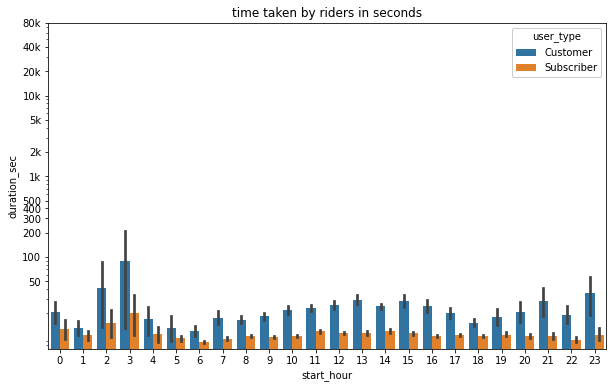

In [174]:
plt.figure(figsize=[10,6])
ax = sns.barplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,300,400,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);
plt.title('time taken by riders in seconds');


### customers have high time than subscribers,subscriber type 2 AM, 3 AM the duration of biking is longer than any hour




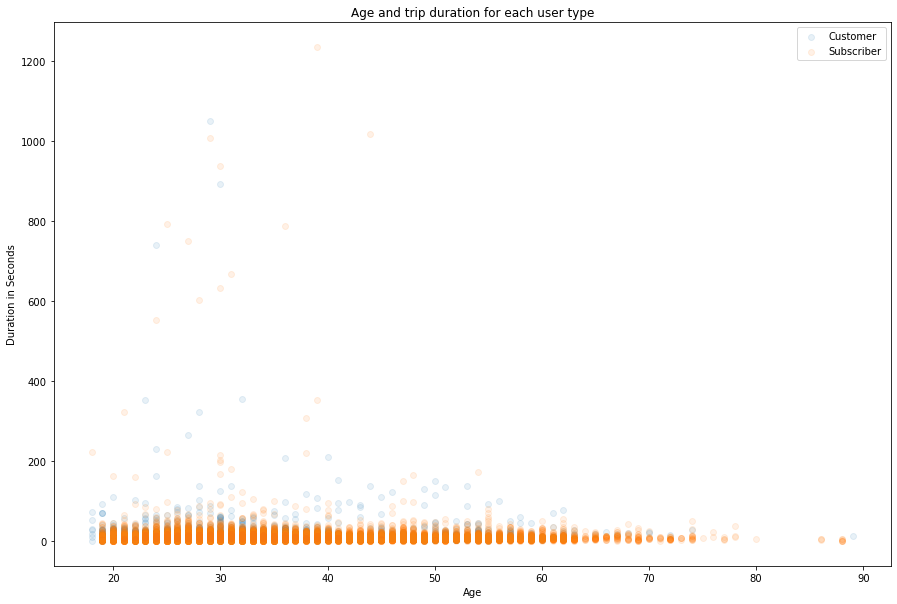

In [175]:
# plotting a scatterplot  
df1 = df.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df1[df1['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'Age', y = 'duration_sec', alpha=2/20);
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Duration in Seconds');
plt.title("Age and trip duration for each user type");

#### Note: The majority of older users are Subscribers and they spend little time in their bike trips.Younger Customers trip duration is slightly more than younger subscribers.

- Younger Customers trip duration is slightly more than younger subscribers.
- The majority of older users are Subscribers and they spend little time in their bike trips.

### Were there any interesting or surprising interactions between features?

#### No